Analyzing Dataset for:
Analyze TV show genres to identify the most popular genres or combinations of genres.

Step 1: Data Understanding

In [1]:
#importing required Libs
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#doing some settings
plt.style.use("ggplot")
pd.set_option("display.max_columns",200)

In [3]:
#importing dataset
df=pd.read_csv("/kaggle/input/full-tmdb-tv-shows-dataset-2023-150k-shows/TMDB_tv_dataset_v3.csv")
df


,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,first_air_date,last_air_date,homepage,in_production,original_name,popularity,poster_path,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,False,Game of Thrones,1083.917,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,False,La Casa de Papel,96.354,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,True,Stranger Things,185.711,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,False,The Walking Dead,489.746,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,False,Lucifer,416.668,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159005,210116,Běž!,1,6,cs,0,0.000,NaN,False,NaN,2018-05-07,2018-06-11,https://www.stream.cz/bez,True,Běž!,0.600,/5yeBnoTctdzF2D9h6qMr3x8yWZr.jpg,Scripted,Returning Series,NaN,Reality,Lenka Václavová,cs,Stream.cz,CZ,Český,NaN,Czech Republic,0
159006,210117,Laura Miller,1,1,fr,0,0.000,NaN,False,NaN,NaN,NaN,NaN,True,Laura Miller,0.600,NaN,Scripted,Returning Series,NaN,"Drama, Mystery",NaN,fr,NaN,FR,Français,Felicita Films,France,0
159007,210120,Het Cabaret van Kopspijkers,3,8,nl,0,0.000,NaN,False,NaN,2001-12-31,2005-12-31,NaN,True,Het Cabaret van Kopspijkers,0.880,/AaqeOvXjhp5mEHrRc4OyrpgrS58.jpg,Scripted,Returning Series,NaN,NaN,NaN,nl,NaN,NL,Nederlands,NaN,NaN,0
159008,231597,Ex-Wife Don't Leave,1,26,zh,0,0.000,"Song Wei Wei found her husband, Li Bai Han, ch...",False,NaN,2023-07-20,2023-07-30,NaN,True,前妻不准逃,1.557,/s4meVUqfwF12EfdkyLdLrQE1pVv.jpg,Scripted,Returning Series,NaN,Drama,NaN,zh,Tencent Video,CN,普通话,Tencent Video,NaN,0


In [4]:
df['vote_average']=df['vote_average'].apply(func=round)
df['popularity']=df['popularity'].apply(func=round)

df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,first_air_date,last_air_date,homepage,in_production,original_name,popularity,poster_path,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,False,Game of Thrones,1084,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,False,La Casa de Papel,96,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,9,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,True,Stranger Things,186,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,False,The Walking Dead,490,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,False,Lucifer,417,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [5]:
df.shape

(159010, 29)

In [6]:
df.head(10)

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,first_air_date,last_air_date,homepage,in_production,original_name,popularity,poster_path,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,False,Game of Thrones,1084,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,False,La Casa de Papel,96,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,9,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,True,Stranger Things,186,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,False,The Walking Dead,490,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,False,Lucifer,417,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
5,69050,Riverdale,7,137,en,13180,8,"Set in the present, the series offers a bold, ...",False,/soQgquPkLmUu9eKLJJzuA4KZDyi.jpg,2017-01-26,2023-08-23,http://www.cwtv.com/shows/riverdale/,False,Riverdale,144,/c1ROxK1Afo6YuGi3j6ClXmrNcHi.jpg,Scripted,Ended,"To save the future, they must survive the past.","Crime, Drama, Mystery",Roberto Aguirre-Sacasa,en,The CW,US,English,"Warner Bros. Television, Berlanti Productions,...",United States of America,45
6,93405,Squid Game,2,9,ko,13053,8,Hundreds of cash-strapped players accept a str...,False,/2meX1nMdScFOoV4370rqHWKmXhY.jpg,2021-09-17,2021-09-17,https://www.netflix.com/title/81040344,True,오징어 게임,116,/dDlEmu3EZ0Pgg93K2SVNLCjCSvE.jpg,Scripted,Returning Series,45.6 billion won is child's play,"Action & Adventure, Mystery, Drama",Hwang Dong-hyuk,"en, ko, ur",Netflix,KR,"English, 한국어/조선말, اردو","Siren Pictures, Firstman Studio",South Korea,0
7,1396,Breaking Bad,5,62,en,12398,9,"When Walter White, a New Mexico chemistry teac...",False,/tsRy63Mu5cu8etL1X7ZLyf7UP1M.jpg,2008-01-20,2013-09-29,http://www.amc.com/shows/breaking-bad,False,Breaking Bad,248,/3xnWaLQjelJDDF7LT1WBo6f4BRe.jpg,Scripted,Ended,Change the equation.,"Drama, Crime",Vince Gilligan,"en, de, es",AMC,US,"English, Deutsch, Español","Sony Pictures Television Studios, High Bridge ...",United States of America,0
8,71712,The Good Doctor,6,116,en,11768,9,"Shaun Murphy, a young surgeon with autism and ...",False,/xXRsKNJHTOGrs5wfYAxkbM2RiyT.

In [7]:
df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 'overview', 'adult',
       'backdrop_path', 'first_air_date', 'last_air_date', 'homepage',
       'in_production', 'original_name', 'popularity', 'poster_path', 'type',
       'status', 'tagline', 'genres', 'created_by', 'languages', 'networks',
       'origin_country', 'spoken_languages', 'production_companies',
       'production_countries', 'episode_run_time'],
      dtype='object')

In [8]:
df.dtypes

id                       int64
name                    object
number_of_seasons        int64
number_of_episodes       int64
original_language       object
vote_count               int64
vote_average             int64
overview                object
adult                     bool
backdrop_path           object
first_air_date          object
last_air_date           object
homepage                object
in_production             bool
original_name           object
popularity               int64
poster_path             object
type                    object
status                  object
tagline                 object
genres                  object
created_by              object
languages               object
networks                object
origin_country          object
spoken_languages        object
production_companies    object
production_countries    object
episode_run_time         int64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of             id                         name  number_of_seasons  \
0         1399              Game of Thrones                  8   
1        71446                  Money Heist                  3   
2        66732              Stranger Things                  4   
3         1402             The Walking Dead                 11   
4        63174                      Lucifer                  6   
...        ...                          ...                ...   
159005  210116                         Běž!                  1   
159006  210117                 Laura Miller                  1   
159007  210120  Het Cabaret van Kopspijkers                  3   
159008  231597          Ex-Wife Don't Leave                  1   
159009  231545                       토종 외국인                  1   

        number_of_episodes original_language  vote_count  vote_average  \
0                       73                en       21857             8   
1                       4

Step 2: Data Prep

In [10]:
#cleaning data
df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 'overview', 'adult',
       'backdrop_path', 'first_air_date', 'last_air_date', 'homepage',
       'in_production', 'original_name', 'popularity', 'poster_path', 'type',
       'status', 'tagline', 'genres', 'created_by', 'languages', 'networks',
       'origin_country', 'spoken_languages', 'production_companies',
       'production_countries', 'episode_run_time'],
      dtype='object')

In [11]:
df=df[['id', 'name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 
       #'overview', 'adult','backdrop_path', 'first_air_date', 'last_air_date', 'homepage',
       #'in_production', 'original_name', 
       'popularity', 
       #'poster_path', 'type','status', 'tagline', 
       'genres', 'created_by', 'languages', 
       #'networks','origin_country', 'spoken_languages', 'production_companies',
       #'production_countries', 
       'episode_run_time']].copy()
df

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8,1084,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,0
1,71446,Money Heist,3,41,es,17836,8,96,"Crime, Drama",Álex Pina,es,70
2,66732,Stranger Things,4,34,en,16161,9,186,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,0
3,1402,The Walking Dead,11,177,en,15432,8,490,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,42
4,63174,Lucifer,6,93,en,13870,8,417,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,45
...,...,...,...,...,...,...,...,...,...,...,...,...
159005,210116,Běž!,1,6,cs,0,0,1,Reality,Lenka Václavová,cs,0
159006,210117,Laura Miller,1,1,fr,0,0,1,"Drama, Mystery",NaN,fr,0
159007,210120,Het Cabaret van Kopspijkers,3,8,nl,0,0,1,NaN,NaN,nl,0
159008,231597,Ex-Wife Don't Leave,1,26,zh,0,0,2,Drama,NaN,zh,0


In [12]:
df.isna().sum()

id                         0
name                       5
number_of_seasons          0
number_of_episodes         0
original_language          0
vote_count                 0
vote_average               0
popularity                 0
genres                 64289
created_by            124095
languages              53791
episode_run_time           0
dtype: int64

In [13]:
df=df.rename(columns={'name':'show_name'})
df

,id,show_name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8,1084,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,0
1,71446,Money Heist,3,41,es,17836,8,96,"Crime, Drama",Álex Pina,es,70
2,66732,Stranger Things,4,34,en,16161,9,186,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,0
3,1402,The Walking Dead,11,177,en,15432,8,490,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,42
4,63174,Lucifer,6,93,en,13870,8,417,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,45
...,...,...,...,...,...,...,...,...,...,...,...,...
159005,210116,Běž!,1,6,cs,0,0,1,Reality,Lenka Václavová,cs,0
159006,210117,Laura Miller,1,1,fr,0,0,1,"Drama, Mystery",NaN,fr,0
159007,210120,Het Cabaret van Kopspijkers,3,8,nl,0,0,1,NaN,NaN,nl,0
159008,231597,Ex-Wife Don't Leave,1,26,zh,0,0,2,Drama,NaN,zh,0


In [14]:
df.columns

Index(['id', 'show_name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 'popularity',
       'genres', 'created_by', 'languages', 'episode_run_time'],
      dtype='object')

In [15]:
df.loc[df.duplicated(subset=['show_name'])]

,id,show_name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
441,81146,Rosario Tijeras,1,60,es,913,7,29,"Action & Adventure, Crime, Drama",NaN,es,60
552,119243,iCarly,3,33,en,742,8,68,Comedy,Dan Schneider,en,25
570,71365,Battlestar Galactica,1,2,en,720,8,22,"Action & Adventure, Drama, Sci-Fi & Fantasy",Ronald D. Moore,en,90
576,2875,MacGyver,7,139,en,717,8,255,Action & Adventure,Lee David Zlotoff,en,45
597,2996,The Office,2,12,en,699,8,29,Comedy,"Ricky Gervais, Stephen Merchant",en,30
...,...,...,...,...,...,...,...,...,...,...,...,...
158971,43507,Capriccio,1,1,de,0,0,1,News,NaN,de,30
158977,231573,Hoochie Daddies,1,1,en,0,0,0,NaN,Crystal Hutchinson,en,46
158994,231543,The Idol,1,8,en,0,0,1,NaN,NaN,ru,0
159002,210109,The Vietnam War,1,3,en,0,0,1,Documentary,Lyndy Saville,en,60


In [16]:
#checking duplicated shows 
df.query('show_name=="The Office"')

,id,show_name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
78,2316,The Office,9,186,en,3443,9,180,Comedy,"Ricky Gervais, Stephen Merchant, Greg Daniels",en,0
597,2996,The Office,2,12,en,699,8,29,Comedy,"Ricky Gervais, Stephen Merchant",en,30
15995,90762,The Office,2,27,hi,6,7,4,Comedy,"Adhir Bhat, Sumit Roy, Anurag Pandey",hi,23
87965,24876,The Office,1,6,en,0,0,8,Comedy,NaN,en,30
104863,70633,The Office,3,26,fi,0,0,2,Comedy,NaN,fi,22
156459,37054,The Office,2,30,he,0,0,1,Comedy,NaN,he,25


In [17]:
#removing duplicates
df=df.loc[~df.duplicated(subset='show_name')]\
.reset_index(drop=True).copy()


In [18]:
df.query('show_name=="The Office"')

,id,show_name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
78,2316,The Office,9,186,en,3443,9,180,Comedy,"Ricky Gervais, Stephen Merchant, Greg Daniels",en,0


Step : 3 Feature Understanding

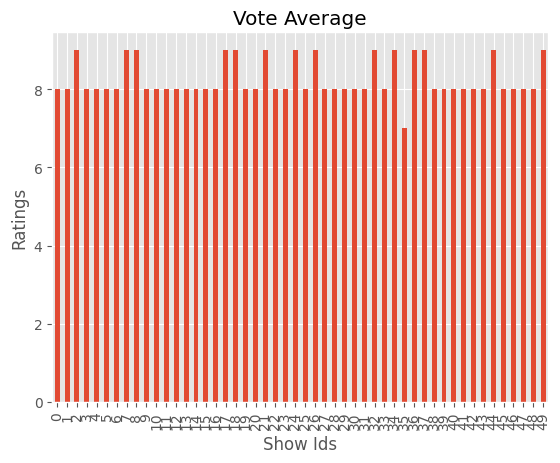

In [19]:
ax1=df["vote_average"].head(50)\
.plot(kind='bar', title="Vote Average")
ax1.set_xlabel('Show Ids')
ax1.set_ylabel('Ratings')
plt.show()

Step 4: Feature Relationships

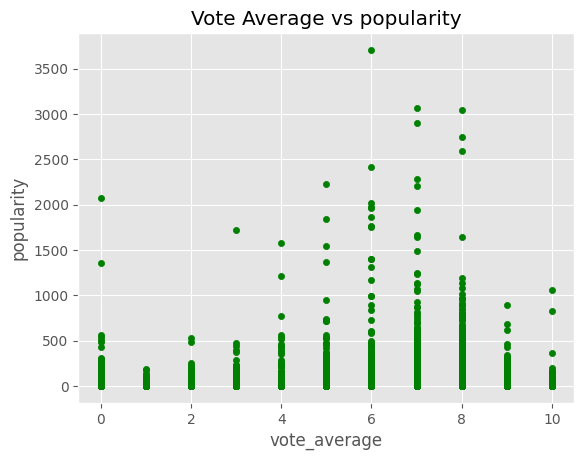

In [20]:
df.plot(kind="scatter",
       x='vote_average',
       y='popularity',
       title='Vote Average vs popularity',
       color='g')
plt.show()

In [21]:
df.head()

,id,show_name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,popularity,genres,created_by,languages,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8,1084,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,0
1,71446,Money Heist,3,41,es,17836,8,96,"Crime, Drama",Álex Pina,es,70
2,66732,Stranger Things,4,34,en,16161,9,186,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,0
3,1402,The Walking Dead,11,177,en,15432,8,490,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,42
4,63174,Lucifer,6,93,en,13870,8,417,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,45


In [22]:
df.shape

(150179, 12)

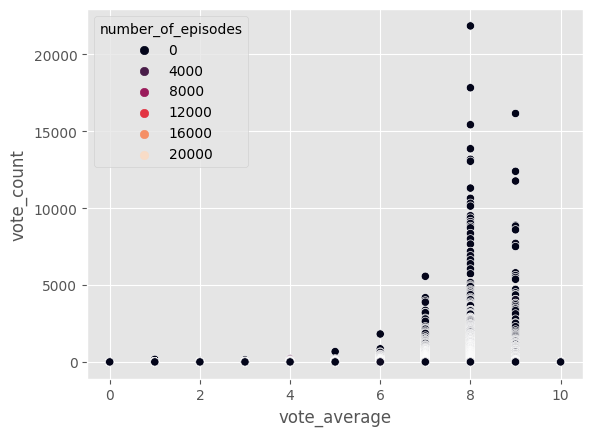

In [23]:
ax2=sb.scatterplot(x='vote_average',
                   y='vote_count',
                   data=df,
                   hue='number_of_episodes',
                   palette='rocket')
plt.show()

<Axes: >

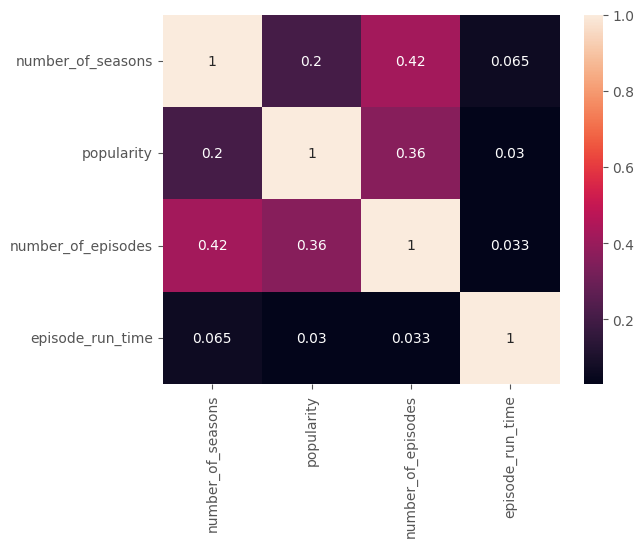

In [24]:
df_corr=df[['number_of_seasons','popularity','number_of_episodes','episode_run_time']].dropna().corr()
sb.heatmap(df_corr, annot=True)

In [25]:
from plotly.express import scatter
scatter(data_frame=df[df['vote_average'] > 0],
        x='number_of_seasons', y='number_of_episodes', color='vote_average', hover_name='show_name',
        log_x=True, log_y=True)

In [26]:
scatter(data_frame=df[df['vote_average'] == 10],
           x='number_of_seasons', y='number_of_episodes', color='vote_average', 
        hover_name='show_name', log_x=True, log_y=True, color_continuous_scale='bluered_r')

In [27]:
genres_split = df['genres'].str.split(', ', expand=True)

top_genres = pd.get_dummies(genres_split, prefix='genre').sum()
top_genres = pd.DataFrame(top_genres)
top_genres['genre'] = top_genres.index
top_genres['genre'] = top_genres['genre'].str.lstrip('genre_')
top_genres = top_genres.rename(columns={0: 'Count'})
top_genres = top_genres.sort_values(by = 'Count', ascending = False).reset_index(drop = True)
top_genres.head(10)

,Count,genre
0,21571,Drama
1,18541,Documentary
2,14171,Comedy
3,9189,Animation
4,8278,Reality
5,6997,Drama
6,5777,Comedy
7,3120,Action & Adventure
8,3055,Crime
9,2577,Family


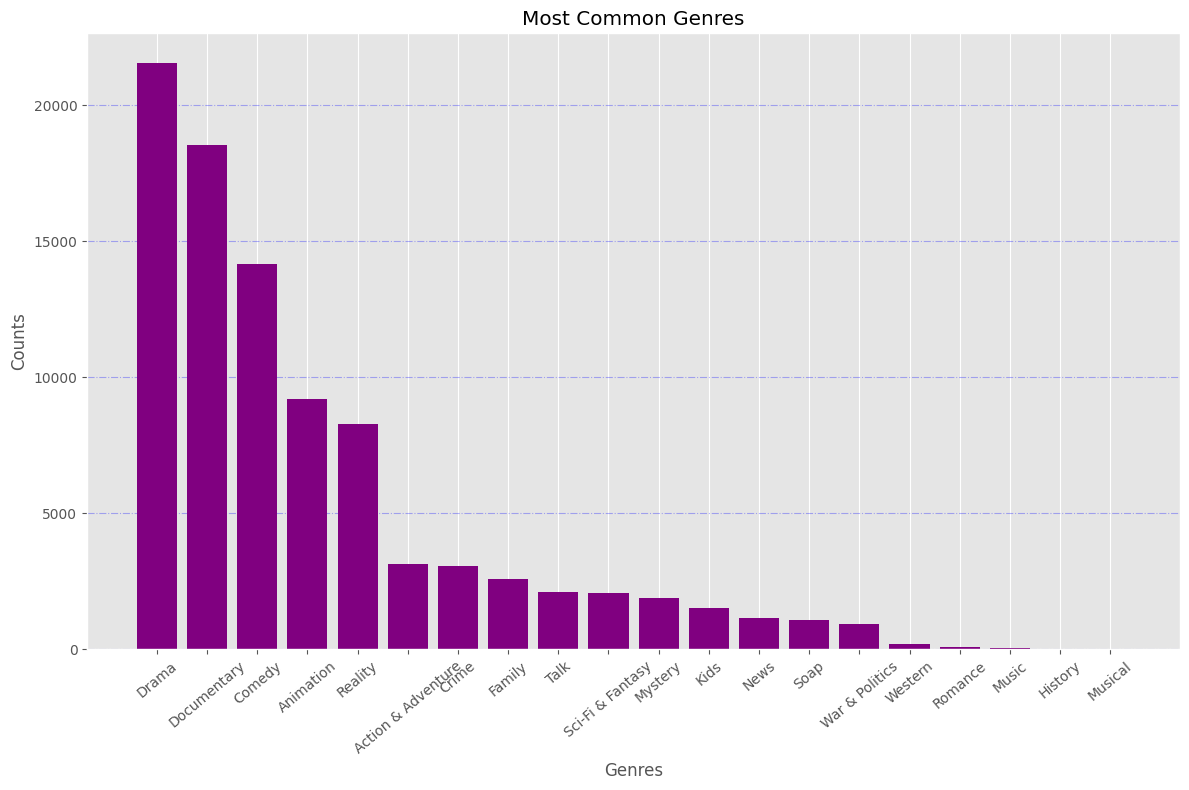

In [28]:
plt.figure(figsize=(12, 8))

# Bar chart
plt.bar(top_genres['genre'], top_genres['Count'], color='purple')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Most Common Genres')
plt.grid(True, color='blue', linestyle='-.', alpha=0.3, axis='y')
plt.xticks(rotation=40)

plt.tight_layout()
plt.show()